## ECE253, HW3, Report
### William Argus A12802324

#### Academic Integrity Policy: Integrity of scholarship is essential for an academic community. The University expects that both faculty and students will honor this principle and in so doing protect the validity of University intellectual work. For students, this means that all academic work will be done by the individual to whom it is assigned, without unauthorized aid of any kind. By including this in my report, I agree to abide by the Academic Integrity Policy mentioned above.

### Problem 1

In [ ]:
### Matlab Code

%% ECE253, HW3, Problem 1, Version 2
% William Argus A12802324
%% setup
clc;
clear all;
close all;

image = imread('geisel.jpg'); 
imageGray = rgb2gray(image); 
te = 130 
edges = cannyEdgeDetection(imageGray, te); 
figure(3); 
imshow(im2uint8(edges/255));  
title('Final edge image after thresholding', 'FontSize', 16); 
%% function 
function imageEdges = cannyEdgeDetection(imageGray, te)
    %% Part 1
    k = (1/159)*[2 4 5 4 2; 4 9 12 9 4; 5 12 15 12 5; 4 9 12 9 4; 2 4 5 4 2];
    imageSmooth = conv2(imageGray, k);
    imageSmooth = im2uint8(imageSmooth/255);

    %% Part 2

    kx = [-1 0 1; -2 0 2; -1 0 1];
    ky = [-1 -2 -1; 0 0 0; 1 2 1];

    gX = conv2(imageSmooth, kx);
    gY = conv2(imageSmooth, ky);
    absGradient = sqrt(gX.^2 + gY.^2);
    gX(gX == 0) = 0.0001;
    angleGradient = atand(gY./gX);
    figure(1);
    imshow(im2uint8(absGradient/255));
    title('Original gradient magnitude image', 'FontSize', 16);

    %% Part 3
    angleGradient(-22.5 <= angleGradient & 22.5 > angleGradient) = 0;
    angleGradient(-67.5 <= angleGradient & -22.5 > angleGradient) = -45;
    angleGradient(67.5 > angleGradient & 22.5 <= angleGradient) = 45;
    angleGradient(-67.5 > angleGradient) = 90;
    angleGradient(67.5 <= angleGradient) = 90;

    %for each pixel
    sz = size(absGradient);
    pixel1=0;
    pixel2=0;
    for i = 2:sz(1)-1
       for j = 2:sz(2)-1
           %get gradient direction to pick comparison pixels
           if angleGradient(i,j) == 90
               pixel1 = absGradient(i-1,j);
               pixel2 = absGradient(i+1,j);
           elseif angleGradient(i,j) == -45
               pixel1 = absGradient(i-1,j-1);
               pixel2 = absGradient(i+1,j+1);
           elseif angleGradient(i,j) == 0
               pixel1 = absGradient(i,j+1);
               pixel2 = absGradient(i,j-1);
           elseif angleGradient(i,j) == 45
               pixel1 = absGradient(i-1,j+1);
               pixel2 = absGradient(i+1,j-1);        
           else
               print("ERROR!!");
           end
           if absGradient(i,j) > pixel1 && absGradient(i,j) > pixel2
               nothing=0;
           else
               absGradient(i,j)=0;
           end
        end
    end

    figure(2);
    imshow(im2uint8(absGradient/255));
    title('Image after NMS', 'FontSize', 16);
   
    %% Part 4

    absGradient(absGradient < te) =0;
    imageEdges = absGradient;
end


Value of te used to product final image: 130


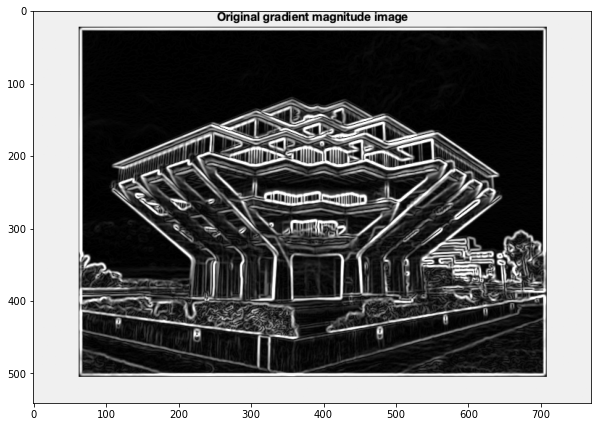

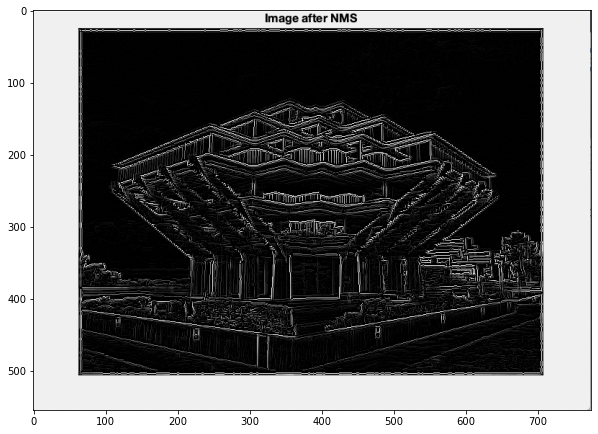

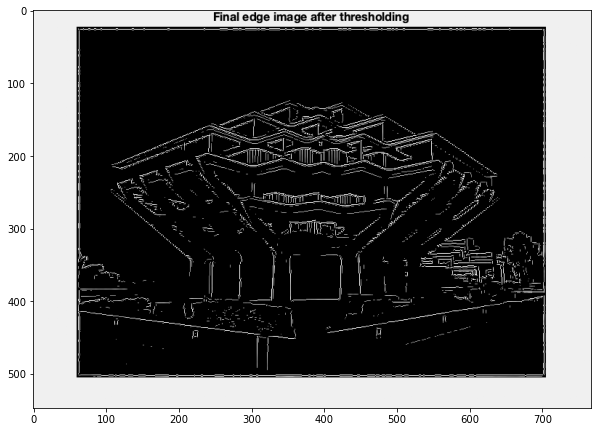

In [194]:
#Results
import matplotlib.pyplot as plt

P1_1 = plt.imread('P1.1.png')
P1_2 = plt.imread('P1.2.png')
P1_3 = plt.imread('P1.3.png')

plt.figure(figsize = (10,10))
plt.imshow(P1_1)
plt.figure(figsize = (10,10))
plt.imshow(P1_2)
plt.figure(figsize = (10,10))
plt.imshow(P1_3)

print('Value of te used to product final image: 130')
print('This ')

### Problem 2

#### Problem 2 (i)

In [ ]:
### Matlab Code for (i)

%% ECE253, HW3, Problem 2i, Version 1
% William Argus A12802324
%% setup
clc;


image = imread('Car.tif');
figure(1);
imshow(image);
title('Unpadded original image')
colorbar; 
%%
sz = size(image);
padsize1 = (512-sz(1))/2 +1;
padsize2 = (512-sz(2))/2 +1;
paddedImage = im2uint8(zeros(512,512));

paddedImage((padsize1+1):(padsize1+sz(1)), (padsize2+1):(padsize2+sz(2))) = image;
%figure(2);
%imshow(paddedImage);

imFFT = fft2(paddedImage);
%test = ifft2(imFFT);
imFFT = fftshift(imFFT);
%figure(4);
%imshow(im2uint8(test/255));
figure(2)
imagesc(-256:255,-256:255,log(abs(imFFT))); 
colorbar; 
title('2D DFT log-magnitude of original image');
xlabel('u'); 
ylabel('v');

[u,v] = meshgrid(-256:255);

%iterate through all possible u values, then through all possible v values,
%then for each (u,v), calcuate Dk
%then Hnr for each (u,v)?
%since there is 4 bursts, need 4 pairs of coordinates for the bursts

%calculate Hnr
Hnr = ones(512,512);
Do = 20
n = 2
uv = [83, -175; 83, -90; 90, 81; 90, 170]
for k = 1:4
    uk = uv(k,1);
    vk = uv(k,2);
    %Dpk = zeros(512,512);
    %Dmk = zeros(512,512);
    Dpk = ((u - uk).^2 + (v - vk).^2).^.5;
    Dmk = ((u + uk).^2 + (v + vk).^2).^.5;
    
    term1 = ( 1+ (Do.*(Dpk.^-1)).^(2*n) ).^-1;
    term2 = ( 1+ (Do.*(Dmk.^-1)).^(2*n) ).^-1;
    temp = term1.*term2;
    Hnr = Hnr.*temp;
end

figure(3);
imshow(Hnr);
colorbar; 
title('The butterworth Notch Reject Filter in frequency domain Hnr(u,v)');
h = gca;
set(h, 'Visible', 'On')

freqImage = Hnr.*imFFT;
figure(4);
imagesc(-256:255,-256:255,log(abs(freqImage)));
colorbar; 
title('The frequency domain of the image after filtering');
xlabel('u'); 
ylabel('v');

unshift = ifftshift(freqImage);
resultPadded = ifft2(unshift);
%unpad image
result = resultPadded((padsize1+1):(padsize1+sz(1)), (padsize2+1):(padsize2+sz(2)));
figure(5);
imshow(im2uint8(result/255));
colorbar; 
title('The final filtered image');


Text(0.5, 1.0, 'The final filtered image')

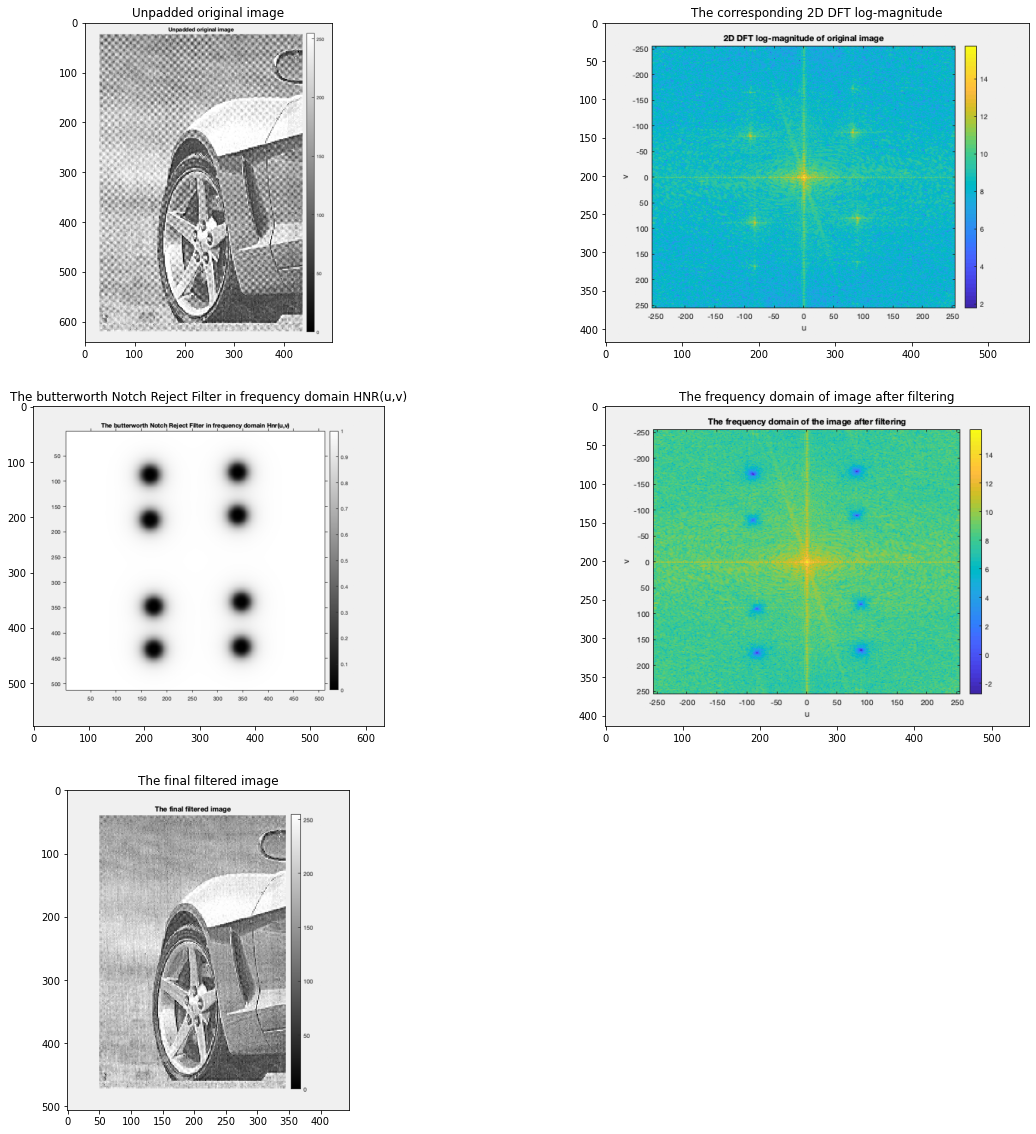

In [206]:
#Results
import matplotlib.pyplot as plt

P2i_1 = plt.imread('P2i.1.png')
P2i_2 = plt.imread('P2i.2.png')
P2i_3 = plt.imread('P2i.3.png')
P2i_4 = plt.imread('P2i.4.png')
P2i_5 = plt.imread('P2i.5.png')


plt.figure(figsize = (20,20))
plt.subplot(321)
plt.imshow(P2i_1)
plt.title('Unpadded original image')
plt.subplot(322)
plt.imshow(P2i_2)
plt.title('The corresponding 2D DFT log-magnitude')
plt.subplot(323)
plt.imshow(P2i_3)
plt.title('The butterworth Notch Reject Filter in frequency domain HNR(u,v)')
plt.subplot(324)
plt.imshow(P2i_4)
plt.title('The frequency domain of image after filtering')
plt.subplot(325)
plt.imshow(P2i_5)
plt.title('The final filtered image')

#### Problem 2 (ii)

In [ ]:
### Matlab code for (ii)

%% ECE253, HW3, Problem 2ii, Version 1
% William Argus A12802324
%% setup

image = imread('Street.png');
figure(1);
imshow(image);
title('Unpadded original image')
colorbar; 

sz = size(image);
padsize1 = (512-sz(1))/2 +1;
padsize2 = (512-sz(2))/2 +1;
paddedImage = im2uint8(zeros(512,512));

paddedImage((padsize1+1):(padsize1+sz(1)), (padsize2+1):(padsize2+sz(2))) = image;
%figure(2);
%imshow(paddedImage);

imFFT = fft2(paddedImage);
%test = ifft2(imFFT);
imFFT = fftshift(imFFT);
%figure(4);
%imshow(im2uint8(test/255));
figure(2)
imagesc(-256:255,-256:255,log(abs(imFFT))); 
colorbar; 
title('2D DFT log-magnitude of original image');
xlabel('u'); 
ylabel('v');

[u,v] = meshgrid(-256:255);
%%
%iterate through all possible u values, then through all possible v values,
%then for each (u,v), calcuate Dk
%then Hnr for each (u,v)?
%since there is 4 bursts, need 4 pairs of coordinates for the bursts

%calculate Hnr
Hnr = ones(512,512);
Do = 50
n = 2
uv = [0, -165; 165, 0;]
for k = 1:2
    uk = uv(k,1);
    vk = uv(k,2);
    Dpk = ((u - uk).^2 + (v - vk).^2).^.5;
    Dmk = ((u + uk).^2 + (v + vk).^2).^.5;
    
    term1 = ( 1+ (Do.*(Dpk.^-1)).^(2*n) ).^-1;
    term2 = ( 1+ (Do.*(Dmk.^-1)).^(2*n) ).^-1;
    temp = term1.*term2;
    Hnr = Hnr.*temp;
end

figure(3);
imshow(Hnr);
colorbar; 
title('The butterworth Notch Reject Filter in frequency domain Hnr(u,v)');
h = gca;
set(h, 'Visible', 'On')

freqImage = Hnr.*imFFT;
figure(4);
imagesc(-256:255,-256:255,log(abs(freqImage)));
colorbar; 
title('The frequency domain of the image after filtering');
xlabel('u'); 
ylabel('v');

unshift = ifftshift(freqImage);
resultPadded = ifft2(unshift);
%unpad image
result = resultPadded((padsize1+1):(padsize1+sz(1)), (padsize2+1):(padsize2+sz(2)));
figure(5);
imshow(im2uint8(result/255));
colorbar; 
title('The final filtered image');


Text(0.5, 1.0, 'The final filtered image')

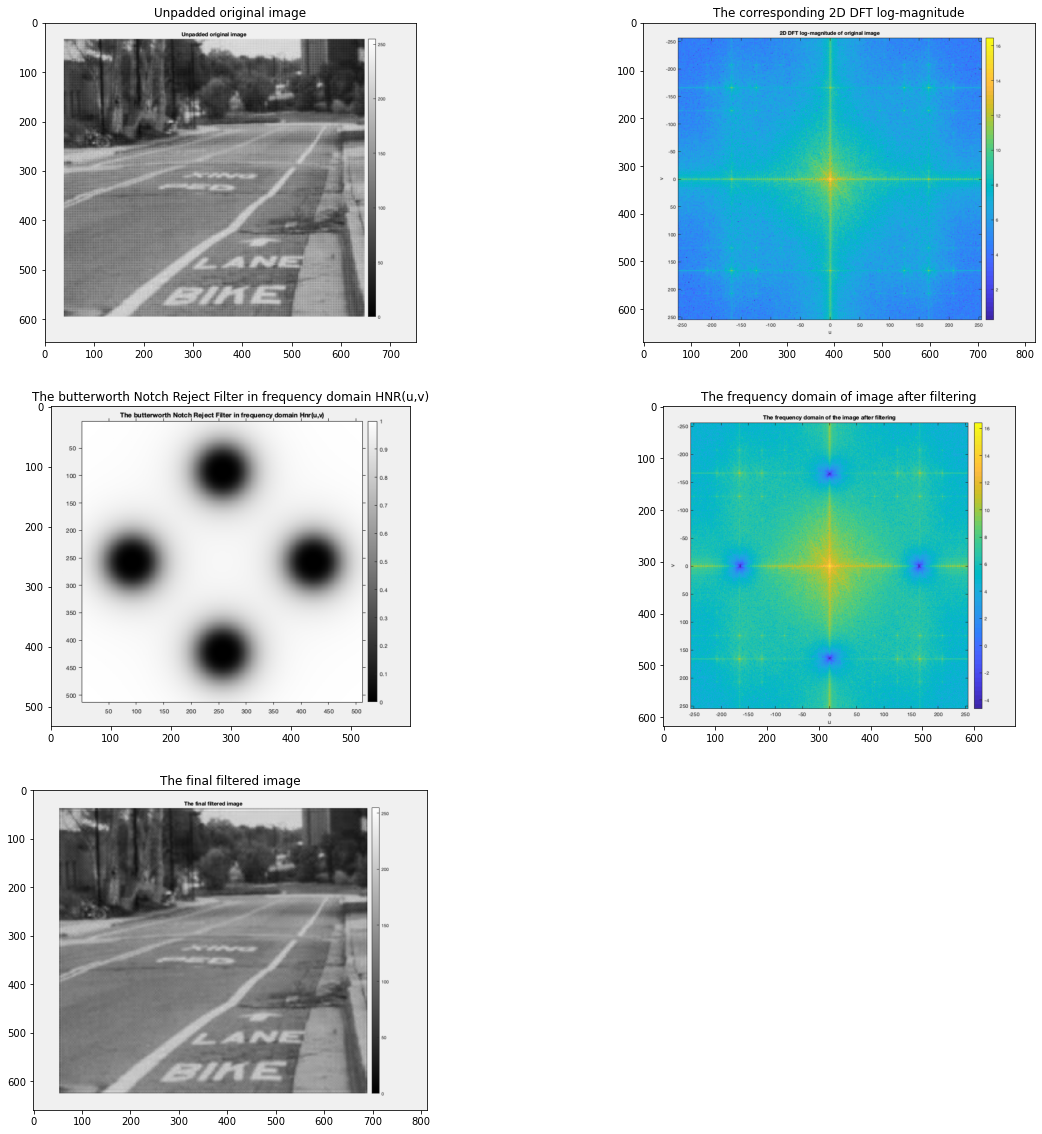

In [207]:
#Results
import matplotlib.pyplot as plt

P2ii_1 = plt.imread('P2ii.1.png')
P2ii_2 = plt.imread('P2ii.2.png')
P2ii_3 = plt.imread('P2ii.3.png')
P2ii_4 = plt.imread('P2ii.4.png')
P2ii_5 = plt.imread('P2ii.5.png')

plt.figure(figsize = (20,20))
plt.subplot(321)
plt.imshow(P2ii_1)
plt.title('Unpadded original image')
plt.subplot(322)
plt.imshow(P2ii_2)
plt.title('The corresponding 2D DFT log-magnitude')
plt.subplot(323)
plt.imshow(P2ii_3)
plt.title('The butterworth Notch Reject Filter in frequency domain HNR(u,v)')
plt.subplot(324)
plt.imshow(P2ii_4)
plt.title('The frequency domain of image after filtering')
plt.subplot(325)
plt.imshow(P2ii_5)
plt.title('The final filtered image')

## Problem 3

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms

In [17]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((.5, .5, .5),(.5, .5, .5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                         transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


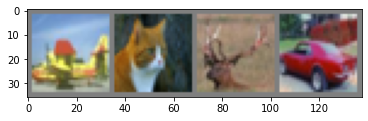

plane   cat  deer   car


In [18]:
import matplotlib.pyplot as plt
import numpy as np
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
for epoch in range(2):  # loop over the dataset multiple times
    print('Training, epoch: ', epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Training, epoch:  0
[1,  2000] loss: 2.179
[1,  4000] loss: 1.909
[1,  6000] loss: 1.702
[1,  8000] loss: 1.596
[1, 10000] loss: 1.541
[1, 12000] loss: 1.488
Training, epoch:  1
[2,  2000] loss: 1.400
[2,  4000] loss: 1.408
[2,  6000] loss: 1.368
[2,  8000] loss: 1.338
[2, 10000] loss: 1.314
[2, 12000] loss: 1.287
Finished Training


In [24]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

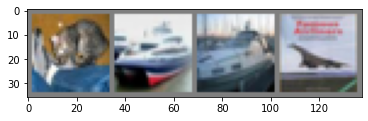

GroundTruth:    cat  ship  ship plane


In [25]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [26]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [27]:
outputs = net(images)

In [29]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   bird   car   car plane


In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [31]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 73 %
Accuracy of   car : 68 %
Accuracy of  bird : 38 %
Accuracy of   cat : 45 %
Accuracy of  deer : 49 %
Accuracy of   dog : 25 %
Accuracy of  frog : 60 %
Accuracy of horse : 66 %
Accuracy of  ship : 53 %
Accuracy of truck : 54 %


In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [33]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [34]:
inputs, labels = data[0].to(device), data[1].to(device)

Number of minibatches:  12500
Number of images per batch:  4


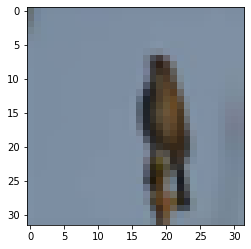

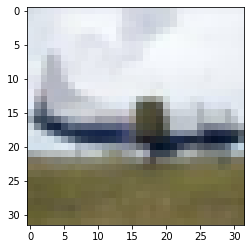

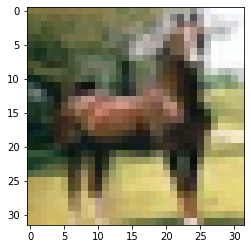

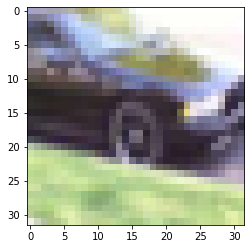

In [67]:
numTraining = 0
inputSize = 0
inputsCheck = 0
for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputsCheck = inputs
    inputSize = len(inputs)
    numTraining = numTraining + 1
print('Number of minibatches: ', numTraining)
print('Number of images per batch: ',inputSize)
imshow(inputsCheck[0])
imshow(inputsCheck[1])
imshow(inputsCheck[2])
imshow(inputsCheck[3])

## (ii)
#### How many images and batches are used to train the network?

12,500 mini-batches loaded in with trainloader. 4 training images per mini-batch, as found in the cell above.
Therefore, a total of 50,000 images used to train the network.
1 batch in total since it was mentioned in lecture that the batch refers to all of the images in the training dataset, therefore in this case the entiirety of the training set is one batch divided into mini batches with 4 images in each to be used to train the network.


## (iii)
#### Do we normalize the images? What do we do in the example?

Yes, normalization of the training and test set is necessary in a neural network as the ranges of feature distributions must be the same in order for the network to learn the correct weights. This is because the weights are determined through multiplication of the errors found via backpropogation by the defined learning rate of the network. 
In the above example, the images are indeed normalized, specifically in the definition of 'transform' (copied below), which is used as an input parameter when loading the training and testing datasets from CIFAR10.

"transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((.5, .5, .5),(.5, .5, .5))])"


## (iv)
#### The losses are dropping! Can you plot out the training loss?
Yes, see plots below for epoch 1 and 2. Please note that training took hours so rather than rewriting the training code block to save the losses in a vector or list for plotting later, the vector was defined by hand from the printed out losses in the training block in order to save time and sanity.
It can be observed that the loss decreses rapidly before starting to level off towards the end of the second epoch. It briefly increases at the beginning of the second epoch before decreasing again. This is not uncommon in training.


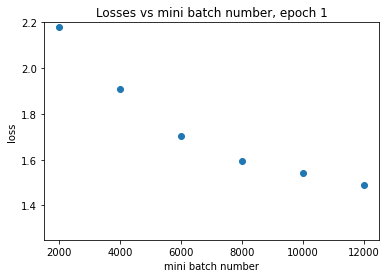

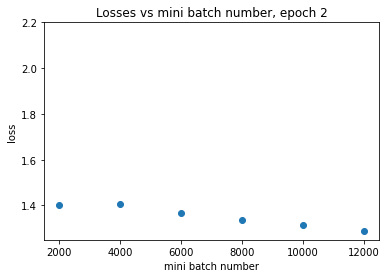

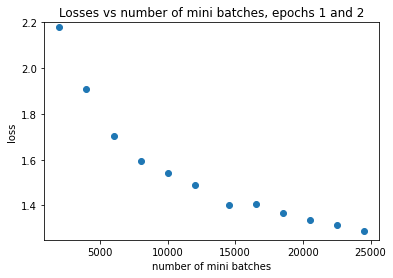

In [65]:
import numpy as np
import matplotlib.pyplot as plt

#epoch 1
losses1 = np.array([2.179,1.909,1.702,1.596,1.541,1.488])
#epoch 2
losses2 = np.array([1.400,1.408,1.368,1.338,1.314,1.287])
#mini-batch number
miniBatch = np.array([2000,4000,6000,8000,10000,12000])

fig=plt.figure(1)
plt.scatter(miniBatch, losses1)
plt.title('Losses vs mini batch number, epoch 1')
plt.xlabel('mini batch number')
plt.ylabel('loss')
plt.ylim([1.25,2.2])

fig=plt.figure(2)
plt.scatter(miniBatch, losses2)
plt.title('Losses vs mini batch number, epoch 2')
plt.xlabel('mini batch number')
plt.ylabel('loss')
plt.ylim([1.25,2.2])





fig=plt.figure(3)
lossesTotal = np.append(losses1, losses2)

miniBatchTotal = np.append(miniBatch, miniBatch+12500)
plt.scatter(miniBatchTotal, lossesTotal)
plt.title('Losses vs number of mini batches, epochs 1 and 2')
plt.xlabel('number of mini batches')
plt.ylabel('loss')
plt.ylim([1.25,2.2])

plt.show()

In [64]:
print(miniBatch+12500)

[14500 16500 18500 20500 22500 24500]


## (v)
#### Now the network is done training. Can you check some successful cases and some failure cases (show some images classified by the network)?

Yes, see below, using code from the tutorial above. The network is not perfect but is much better than a random guess, showing that the network did learn something.


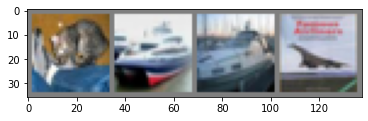

GroundTruth:    cat  ship  ship plane
Predicted:   bird   car   car plane


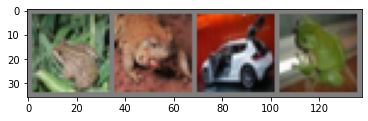

GroundTruth:   frog  frog   car  frog
Predicted:    cat  frog   cat  deer


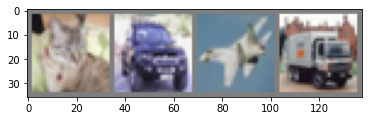

GroundTruth:    cat   car plane truck
Predicted:    cat   car plane truck


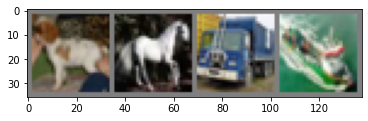

GroundTruth:    dog horse truck  ship
Predicted:    cat horse truck  frog


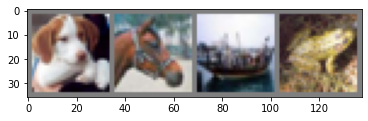

GroundTruth:    dog horse  ship  frog
Predicted:    cat   cat  ship  frog


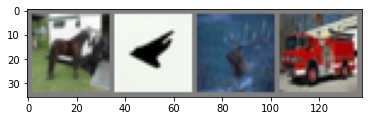

GroundTruth:  horse plane  deer truck
Predicted:  horse plane plane truck


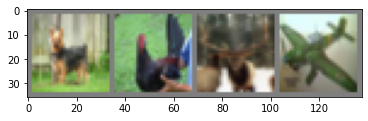

GroundTruth:    dog  bird  deer plane
Predicted:   deer  frog  deer  bird


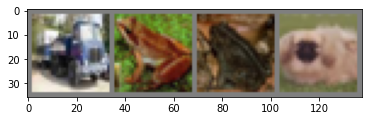

GroundTruth:  truck  frog  frog   dog
Predicted:    car  frog   cat  bird


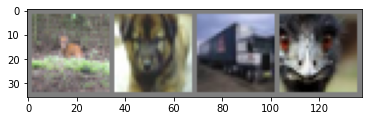

GroundTruth:   deer   dog truck  bird
Predicted:   deer   cat truck   cat


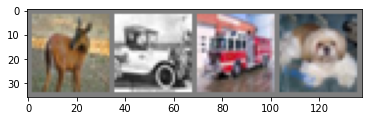

GroundTruth:   deer   car truck   dog
Predicted:  horse   car truck   dog


In [88]:
net = Net()
net.load_state_dict(torch.load(PATH))

dataiter = iter(testloader)
for i in range(0,10):
    images, labels = dataiter.next()
    
    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

## (vi)
#### Can you visualize the output of the 1st layer of CNN using one image from the training set?




Image to be used to visualize output of 1st layer of CNN


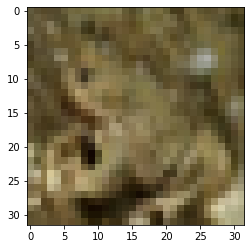

tensor(6)


In [183]:
for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    image = inputs[0]
    label = labels[0]
print('Image to be used to visualize output of 1st layer of CNN')
imshow(image)
print(label)

In [1]:
from scipy.signal import convolve
from scipy.ndimage import correlate
def convolve3D (image, kernal):
    #inputs both (x,x,3)
    layer1 = correlate(image[:,:,0], kernal[:,:,0], mode = 'wrap')
    layer2 = correlate(image[:,:,1], kernal[:,:,1], mode = 'wrap')
    layer3 = correlate(image[:,:,2], kernal[:,:,2], mode = 'wrap')
    result = np.dstack([layer1, layer2, layer3])
    
    result = correlate(image, kernal, mode = 'wrap')
    
    return result

In [2]:
weights = net.conv1.weight.data.numpy()
print(weights.shape)
weights.T.shape
print(weights.shape)
newWeights = (1/2) + weights/2

imageNP = np.transpose(image.numpy(),(1,2,0))
imageNP = (1/2) + imageNP/2

output = [0,0,0,0,0,0]

for i in range(0,6):
    filter = np.transpose(newWeights[i,...],(1,2,0))
    output[i] = convolve3D(imageNP, filter)
    output[i] = ((output[i]-np.amin(output[i]))/(np.amax(output[i])-np.amin(output[i])))
    
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(output[0])
plt.title('output ' + str(1) + ' for first layer of CNN')

plt.subplot(322)
plt.imshow(output[1])
plt.title('output ' + str(2) + ' for first layer of CNN')

plt.subplot(323)
plt.imshow(output[2])
plt.title('output ' + str(3) + ' for first layer of CNN')

plt.subplot(324)
plt.imshow(output[3])
plt.title('output ' + str(4) + ' for first layer of CNN')

plt.subplot(325)
plt.imshow(output[4])
plt.title('output ' + str(5) + ' for first layer of CNN')

plt.subplot(326)
plt.imshow(output[5])
plt.title('output ' + str(6) + ' for first layer of CNN')

    

NameError: name 'net' is not defined